In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [8]:
ht=np.random.randint(140,240,300)

In [10]:
wt= 0.5 * ht -25 + np.random.normal(0,2,len(ht))

In [11]:
df=pd.DataFrame({'ht':ht,'wt':wt})

In [12]:
#1 load the dataset
df

,ht,wt
0,211,80.223471
1,200,75.500986
2,160,55.692896
3,222,84.639951
4,226,88.464507
...,...,...
295,158,51.391061
296,187,69.839345
297,219,85.233196
298,142,44.120240


In [ ]:
#2 cleaning the data

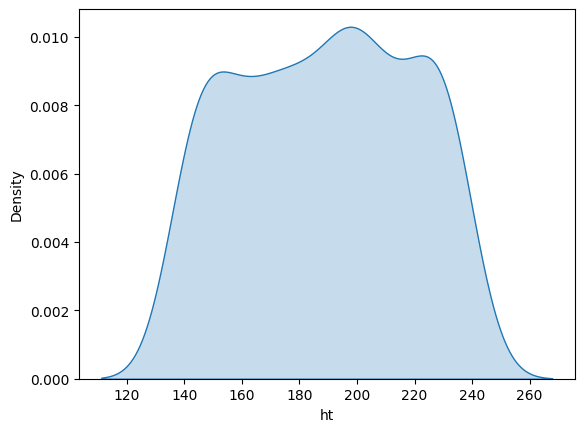

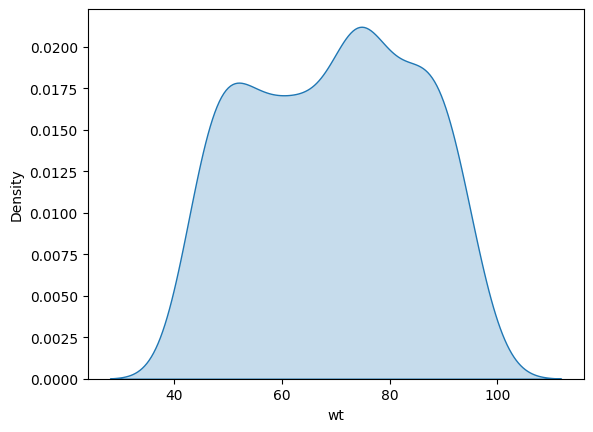

In [15]:
#3 visualize the data
for i in df.columns:
    sns.kdeplot(df[i], shade=True)
    plt.show()

<Axes: xlabel='ht', ylabel='wt'>

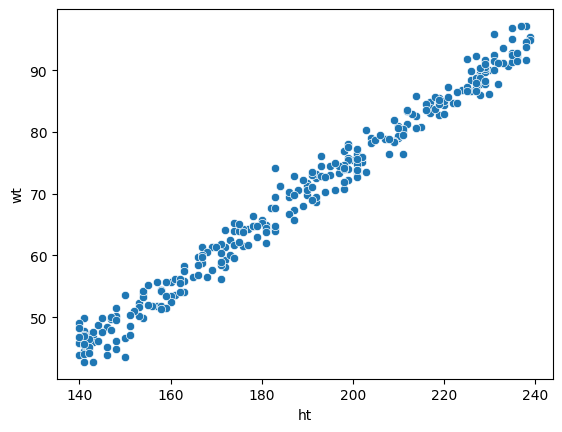

In [16]:
# bivariate analysis
sns.scatterplot(x='ht',y='wt',data=df)

<Axes: xlabel='ht', ylabel='wt'>

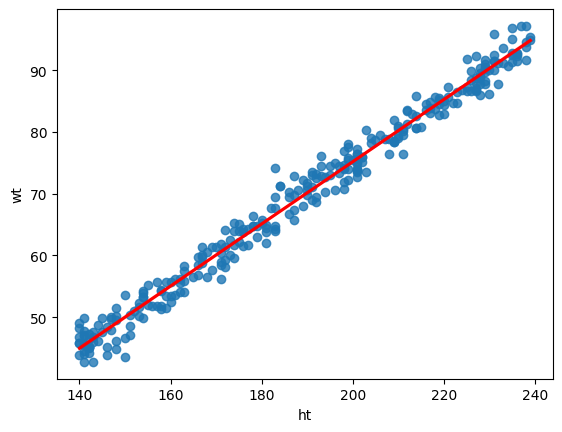

In [18]:
sns.regplot(x='ht',y='wt',data=df, line_kws={'color':'red'})

In [21]:
# split the data into two parts input and output
X=df[['ht']] # input variable
y=df['wt'] # output variable



In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240,), (60,))

In [25]:
from sklearn.preprocessing import StandardScaler
# generally we only scale the input data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
# machine learning model
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression() # instantiate the model
lr.fit(x_train,y_train) # train the model

LinearRegression()

In [39]:
lr.coef_, lr.intercept_

(array([15.14527077]), 69.78035921488552)

y_pred=15.1453 * Ht + 69.78

In [29]:
# find the prediction of the model
y_pred=lr.predict(x_test)

In [32]:
predict_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [33]:
predict_df['MSError']=(predict_df['actual']-predict_df['predicted'])**2

In [35]:
predict_df['MSError'].mean()

4.882625508597778

In [36]:
# evaluation of the model
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
mean_squared_error(y_test,y_pred)

4.882625508597778

In [38]:
r2_score(y_test,y_pred)

0.9789588188298026

In [43]:
sns.load_dataset('car_crashes')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL
